In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#1.5(1)
def laguerre(t, n, beta = 2, sigma = 4):
    l0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    
    if n == 0:
        return l0
    elif n == 1:
        return l1
    elif n >= 2:
        l_n = (2 * 2 - 1 - t * sigma) / 2 * l1 - (2 - 1) / 2 * l0
    for i in range(3, n + 1):
        l0 = l1
        l1 = l_n
        l_n = (2 * i - 1 - sigma * t) / i * l1 - l0 * (i - 1) / i
    return l_n

В цьому завданні ми будуємо функцію для обчислення функції Лаггера за даною формулою,та параметрами за замовчуванням β=2,σ=4.

,t,n,laguerre
0,0.0,20,2.000000
1,0.1,20,0.148800
2,0.2,20,0.369039
3,0.3,20,-0.649693
4,0.4,20,-0.258386
5,0.5,20,0.607406
6,0.6,20,0.645354
7,0.7,20,-0.112714
8,0.8,20,-0.818028
9,0.9,20,-0.813639


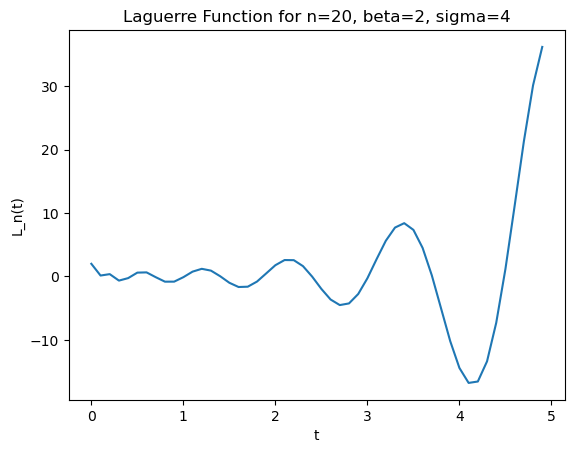

In [3]:
#1.5(2)
def tabulate_laguerre(T, n, beta=2, sigma=4):
    t_values = np.arange(0, T, 0.1)
    laguerre_values = laguerre(t_values, n, beta, sigma)
    
    data = {'t': t_values, 'n': [n]*len(t_values), 'laguerre': laguerre_values}
    df = pd.DataFrame(data)
    
    plt.plot(t_values, laguerre_values)
    plt.title(f'Laguerre Function for n={n}, beta={beta}, sigma={sigma}')
    plt.xlabel('t')
    plt.ylabel(f'L_n(t)')
    
    return df

df = tabulate_laguerre(T=5, n=20 , beta=2, sigma=4)
df

Це завдання створює та відображає графік функції Лагерра для заданих параметрів n, beta та sigma.Також створюється DataFrame, який містить значення t, n та laguerre з поперпеднього завдання. Графік відображає залежність функції Лагерра від змінної t.

In [4]:
#1.5(3)
def experiment(T, beta, sigma, epsilon=1e-3, N=20):
    t_values = np.linspace(0, T, 1000)
    n_values = range(1, N + 1)
    result = None

    for t in t_values:
        all_below_threshold = True
        for n in range(0, N+1):
            if abs(laguerre(t, n, beta, sigma)) > epsilon:
                all_below_threshold = False
                break
        if all_below_threshold and result is None:
            result = t
            break

    data = {'t': t_values}
    for n in n_values:
        data[f'n={n}'] = laguerre(t_values, n, beta, sigma)

    df = pd.DataFrame(data)

    return result, df.round(5)

result, df = experiment(T=100, beta=2, sigma=4)
print(result)
df


79.07907907907908


,t,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,...,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20
0,0.0000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
1,0.1001,1.08497,0.50550,0.05172,-0.29380,-0.54668,-0.72094,-0.82906,-0.88217,-0.89014,...,-0.80442,-0.72510,-0.62955,-0.52282,-0.40925,-0.29253,-0.17579,-0.06163,0.04782,0.15085
2,0.2002,0.32612,-0.45997,-0.86125,-0.98978,-0.93409,-0.76300,-0.52907,-0.27143,-0.01825,...,0.40417,0.55421,0.65857,0.71780,0.73477,0.71390,0.66063,0.58092,0.48093,0.36668
3,0.3003,-0.29802,-1.00863,-1.07852,-0.80705,-0.39600,0.02583,0.38297,0.63795,0.77947,...,0.75506,0.62619,0.44937,0.24662,0.03764,-0.16110,-0.33677,-0.48021,-0.58574,-0.65081
4,0.4004,-0.80621,-1.23375,-0.86012,-0.23551,0.33962,0.72824,0.89472,0.86127,0.67826,...,0.09748,-0.19735,-0.44519,-0.62440,-0.72499,-0.74672,-0.69683,-0.58770,-0.43478,-0.25469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.5996,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
996,99.6997,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
997,99.7998,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
998,99.8999,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000


Це завдання виконує експеримент, шукаючи перше значення t, при якому всі значення функцій Лагерра для заданих n (від 1 до N) стають менше за задане епсілон. Результатом є значення t, яке задовольняє умову, та DataFrame, який містить значення функцій Лагерра для різних n у вибраних точках t.

In [5]:
# 1.5(4)
def quad(f, a, b):
    x = np.linspace(a, b, 1000)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / 1000

def laguerre_transform(f, N, beta = 2, sigma = 4):
    integrand = lambda t: f(t) * laguerre(t, N, beta, sigma) * np.exp(-(beta - sigma) * t)
    T = experiment(T=100, beta=beta, sigma=sigma)[0]
    return quad(integrand, 0, T)

laguerre_transform(lambda t: np.exp(-t**2), N=20, beta=2, sigma=4)

0.15840758122345672

Це завдання визначає функцію laguerre_transform, яка обчислює перетворення Лагерра для заданої функції f та параметрів N, beta, та sigma. Функція quad використовує числовий метод квадратур для обчислення інтегралу.

В конкретному виклику laguerre_transform, використовується функція np.exp(-t**2) ,як вихідна функція f. Обчислюється перетворення Лагерра для цієї функції з параметрами N=20, beta=2, та sigma=4.

In [8]:
# #1.5(5)
def tabulate_transform(f, N, beta, sigma):
    N = range(0, N)
    return pd.DataFrame({
        'N': N,
        'transform': [laguerre_transform(f, n, beta, sigma) for n in N]})

def custom_function(t):
    if 0 <= t < 2 * np.pi:
        return np.sin(t - np.pi/2) + 1
    else:
        return 0
    
df = tabulate_transform(custom_function, N=20, beta=2, sigma=4)

df

,N,transform
0,0,5.339547e+02
1,1,-8.639241e+03
2,2,6.493954e+04
3,3,-2.948804e+05
4,4,8.802141e+05
5,5,-1.747870e+06
6,6,2.162312e+06
7,7,-1.197186e+06
8,8,-6.528549e+05
9,9,1.242727e+06


Це завдання використовує функцію перетворення Лагерра для аналізу та табулювання перетворень відносно заданої функції custom_function та параметрів N, beta, та sigma

In [10]:
#1.5(6)
def reversed_lagger_transformation(h_list, t, beta=2, sigma=4):
    result_sum = 0

    for i in range(len(h_list)):
        result_sum += h_list[i] * laguerre(t, i, beta, sigma)

    return result_sum


h_list = tabulate_transform(custom_function, 20, 2, 4)['transform'].tolist()
reversed_lagger_transformation(h_list, t=2)

865223.3324741708

Це завдання визначає функцію reversed_lagger_transformation, яка виконує обернене перетворення Лагерра для заданого списку коефіцієнтів h_list та значення часу t, а також параметрів beta та sigma. В даному випадку, h_list отримується з виклику функції tabulate_transform для заданої функції custom_function та параметрів N=20, beta=2, та sigma=4.

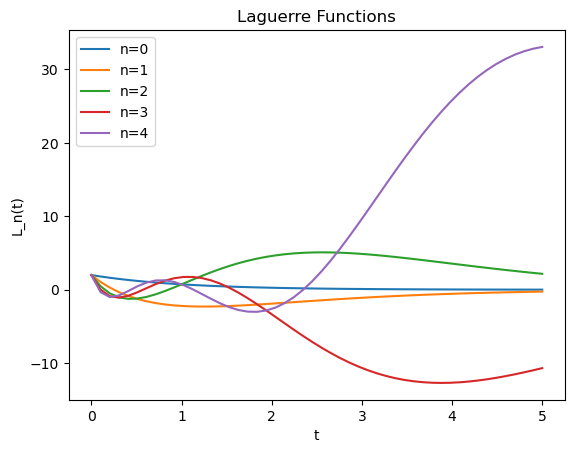

In [11]:
#1.5(7)
t_values = np.linspace(0, 5, 50)
n_values = [0, 1, 2, 3, 4]

for n in n_values:
    laguerre_values = [laguerre(t, n) for t in t_values]
    plt.plot(t_values, laguerre_values, label=f'n={n}')

plt.title('Laguerre Functions')
plt.xlabel('t')
plt.ylabel('L_n(t)')
plt.legend()
plt.show()

Це завдання створює графіки функцій Лагерра для різних значень параметра n. Використовуючи значення t від 0 до 5, код обчислює значення функцій Лагерра для обраних n та відображає їх на одному графіку.

Графіки демонструють форму та залежність функцій Лагерра від параметра n. На графіку можна спостерігати, як форма функцій змінюється зі збільшенням параметра n. 

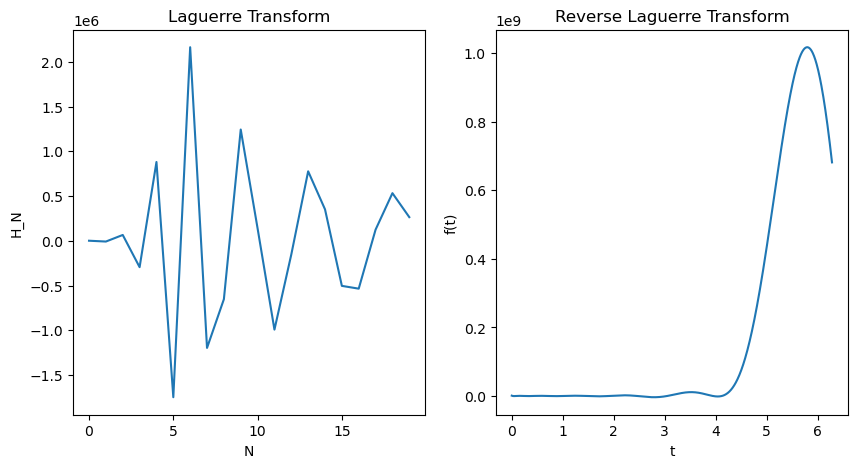

In [12]:
#1.5(8)
def plot_transform(f, N, beta, sigma):
    transform = tabulate_transform(f, N, beta, sigma)
    h_list = transform['transform'].tolist()

    t_values = np.linspace(0, np.pi * 2, 1000)

    reverse_transform = pd.DataFrame({
        't': t_values,
        'reverse_transform': [reversed_lagger_transformation(h_list, t) for t in t_values]
    })

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(transform['N'], transform['transform'])
    plt.title('Laguerre Transform')
    plt.xlabel('N')
    plt.ylabel('H_N')

    plt.subplot(1, 2, 2)
    plt.plot(reverse_transform['t'], reverse_transform['reverse_transform'])
    plt.title('Reverse Laguerre Transform')
    plt.xlabel('t')
    plt.ylabel('f(t)')

    plt.show()


plot_transform(custom_function, N=20, beta=2, sigma=4)

Це завдання визначає функцію plot_transform, яка виводить графіки для перетворення Лагерра та оберненого перетворення Лагерра для заданої функції f та параметрів N, beta, та sigma. 
Графіки виводяться на двох підграфіках:

Laguerre Transform: Показує значення перетворення Лагерра H_N відносно параметра N. Це дозволяє визначити вплив різних значень параметра N на перетворення Лагерра.

Reverse Laguerre Transform: Показує відновлену функцію f(t) за допомогою оберненого перетворення Лагерра для значень параметрів t. Це відображає, наскільки ефективно обернене перетворення може відновити оригінальну функцію.

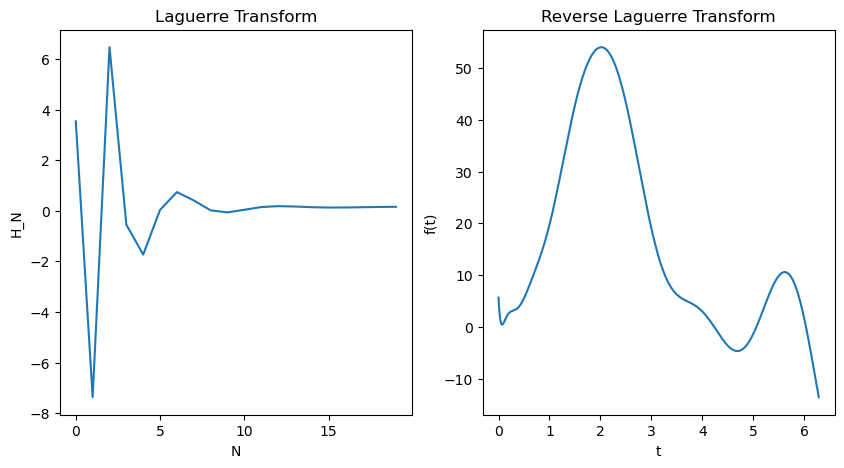

In [13]:
def f2(t):
    return np.exp(-t**2)

plot_transform(f2, N=20, beta=2, sigma=4)

Власна функція

У цій практичній роботі було розглянуто різні аспекти використання функцій Лагерра та їх застосування до обчислень та аналізу. 
Основні етапи та функції включали:

1)Генерація функцій Лагерра: Було визначено функції Лагерра та їх властивості залежно від параметрів n, beta та sigma. Функції Лагерра були використані для аналізу їх поведінки.

2)Табулювання та візуалізація функцій: Були реалізовані табулювання та візуалізація функцій Лагерра для певних параметрів. 
3)Перетворення Лагерра: Були визначені та реалізовані функції для обчислення перетворення Лагерра та оберненого перетворення. Ці функції були використані для аналізу та відновлення оригінальних функцій.

4)Табулювання та візуалізація перетворень: Були визначені функції для табулювання перетворень Лагерра та їх візуалізація. Це дозволило аналізувати вплив параметрів на перетворення та здійснювати обернене перетворення.

Загальний висновок: Дана практична робота надала можливість зрозуміти та використовувати функції Лагерра, вивчити їх властивості, а також виконати та візуалізувати перетворення та обернені перетворення для аналізу функцій.